In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline 

df = pd.read_csv('world-atlas-of-language-structures/language.csv')

list_of_names = df.loc[:,'Name']

# 1 - Looking at number of languags in each language family

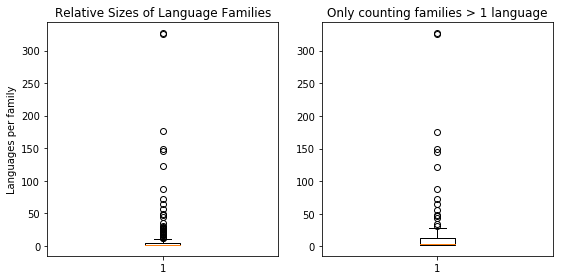

In [3]:
# group families by number of langs in each
langs_per_fam = df.groupby('family')['Name'].count()

# number of langs in each family - might be a good idea to list ones that are > 1 separately 
langs_minus_one = []

for langs in langs_per_fam:
    if langs > 1:
        langs_minus_one.append(langs)

# 2 boxplots to show extra large or extra small language families

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.boxplot(langs_per_fam, showbox=True)
plt.ylabel('Languages per family')
plt.title('Relative Sizes of Language Families')

plt.subplot(1, 2, 2)
plt.boxplot(langs_minus_one, showbox=True)
plt.title('Only counting families > 1 language')
plt.tight_layout()
plt.show()

These boxplots show the concentration of languages in each language family included in this dataset. In the first plot, all of the languages and families are counted, and in the second, only the language families that consisted of more than 1 language are included. The graph highlights the size of the 1 or 2 largest language families compared to the other smaller, or perhaps less researched / less well-known, families. 

# 2 - Comparing tone complexity with syllable structure complexity 

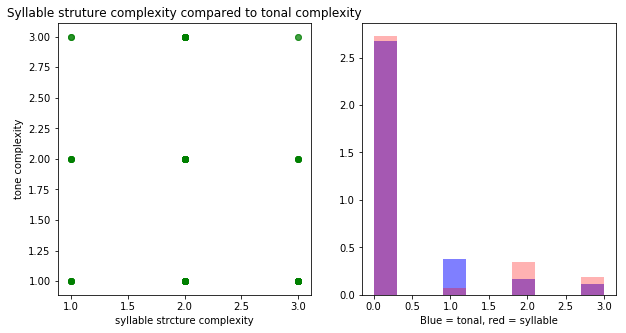

In [4]:
new_table = df.loc[:,['Name', 'family','macroarea','3A Consonant-Vowel Ratio','12A Syllable Structure', '13A Tone']]

# first getting the tone data
tonal_complexity = new_table.loc[:,'13A Tone']

# create an empty list where you can put the data after cleaning it up
numeric_tc = []

# clean up the data from the column and populate the empty list with integers 
for tone in tonal_complexity:
    if pd.isna(tone):
         numeric_tc.append(0)
    else:
         numeric_tc.append(int(tone[0]))

# then basically the same thing for syllable structure complexity
ss_complexity = new_table.loc[:,'12A Syllable Structure']

numeric_ssc = []

for sylst in ss_complexity:
    if pd.isna(sylst):
         numeric_ssc.append(0)
    else:
         numeric_ssc.append(int(sylst[0]))
            
# create the data frame for the two lists

dframe = pd.DataFrame(index=[list_of_names])
dframe['tonal complexity'] = numeric_tc 
dframe['syllable structure'] = numeric_ssc

# get rid of any rows that have 0, because without both variables, there's no way to compare
no_zero_tones = dframe.loc[lambda df: dframe['tonal complexity'] >= 1, ['tonal complexity', 'syllable structure']]
no_zeroes = no_zero_tones.loc[lambda df: no_zero_tones['syllable structure'] >= 1, ['tonal complexity', 'syllable structure']]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(
    x=no_zeroes['syllable structure'],
    y=no_zeroes['tonal complexity'],
    color='green', alpha=.15
)
plt.xlabel('syllable strcture complexity')
plt.ylabel('tone complexity')
plt.title('Syllable struture complexity compared to tonal complexity')

plt.subplot(1,2,2)
plt.hist(numeric_tc, normed=True, color='blue', alpha=.5) 
plt.hist(numeric_ssc, normed=True, color='red', alpha=.3)
plt.xlabel('Blue = tonal, red = syllable')

plt.show()

I was curious to see if there was any correlation betweeen syllable structure complexity and tone complexity, both of which are on scales from 1 (low / none) - 3 (most complex). First I tried a scatter plot, which doesn't seem to show any specific trend. It could also be that this graph type wasn't the best for this kind of comparison. Because of this, I tried to plot the data on a histogram. It looks like, though there are more tonal languages that have less complex syllable structure, languages without tones follow the same pattern.

# 3 - Looking at the number of languages and their locations

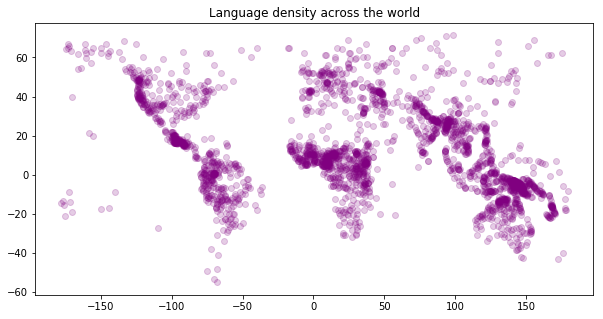

In [5]:
# get the longitude
lang_long = df.loc[:,'longitude']

rounded_long = []
for tude in lang_long:
        rounded_long.append(round(tude,2))

#get the latitude
lang_lat = df.loc[:,'latitude']

rounded_lat = []
for tude in lang_lat:
    rounded_lat.append(round(tude,2))

# make the DF

langmap = pd.DataFrame(index=[list_of_names])
langmap['longitude'] = rounded_long
langmap['latitude'] = rounded_lat

#print (langmap)

plt.figure(figsize=(10,5))
plt.scatter(
    x=langmap['longitude'],
    y=langmap['latitude'],
    color='purple', alpha=.2
)
plt.title('Language density across the world')
plt.show()

Here is a scatter plot showing number of languages based on their geographical location of origin, using rounded coordinates. Because of the opacity setting, more languages are from darker regions, and less languages are from the lighter regions. (The number of speakers of each language is not included in this dataset, so some of them might no longer be (commonly) spoken.)

# 4 - Comparing Inclusive/Exclusive Distinction in Independent Pronouns

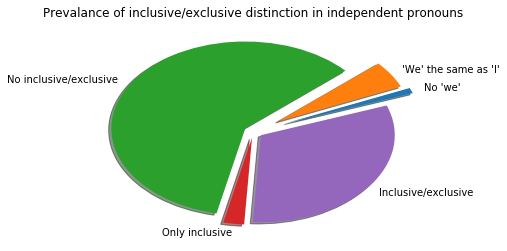

In [6]:
# possible results
# 1 No 'we'
# 2 'We' the same as 'I'
# 3 No inclusive/exclusive
# 4 Only inclusive
# 5 Inclusive/exclusive

# formatting the data so its all integers

testing = df.groupby(['39A Inclusive/Exclusive Distinction in Independent Pronouns'])['Name'].count()
# print(testing)

labelled = [ "No 'we'","'We' the same as 'I'", "No inclusive/exclusive", "Only inclusive", "Inclusive/exclusive"]

plt.pie(testing, shadow=True, startangle=20, explode=(0.27, 0.22, 0.07, 0.07, 0.07), labels=labelled)
plt.title('Prevalance of inclusive/exclusive distinction in independent pronouns')
plt.show()

This pie chart shows the currently existing ways languages either distinguish, or don't, inclusiveness / exclusivness via independent pronouns, and the prevalance of each method. It looks like distinguishing is a bit less common than failing to distinguish between the two options, but there were also other ways languages handled this linguistic ambiguity. 